Based on "Estimating a Dirichlet distribution" (Thomas P. Minka)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
K = 10

In [4]:
alpha_true = 10.0 * 0.9 ** np.arange(K)

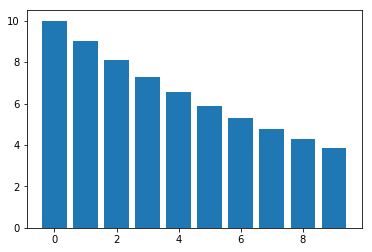

In [5]:
plt.bar(np.arange(K), alpha_true);

In [6]:
p = np.random.dirichlet(alpha_true, size=10000)
p.shape

(10000, 10)

In [7]:
m1 = p.mean(axis=0)

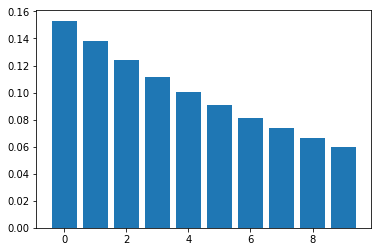

In [8]:
plt.bar(np.arange(K), m1);

In [9]:
m2 = (p ** 2).mean(axis=0)

Compute an estimate of $\sum_k \alpha_k$ based on equation (21) from Minka

In [10]:
s = (m1[0] - m2[0]) / (m2[0] - m1[0] ** 2)
s

66.60169417951013

In [11]:
alpha_estimate = s * m1

Compute alternate using equation (23) from Minka

In [12]:
s_alt = np.exp(np.mean((np.log((m1 - m1 ** 2) / (m2 - m1 ** 2) - 1))[:-1]))

In [13]:
alpha_estimate_alt = s_alt * m1

In [14]:
to_plot = [
    ('true', alpha_true),
    ('estimate', alpha_estimate),
    ('estimate_alt', alpha_estimate_alt),
]

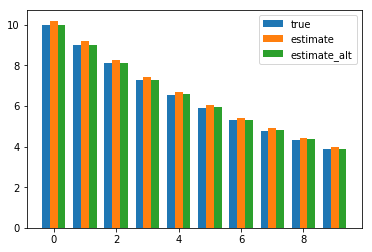

In [15]:
fig, ax = plt.subplots()
group_width = 1.0 + len(to_plot)
offsets = np.arange(len(to_plot), dtype='float') / group_width
offsets -= np.mean(offsets)
for i, (name, a) in enumerate(to_plot):
    ax.bar(np.arange(K) + offsets[i], a, width = 1.0 / group_width, label=name)
ax.legend(loc='best')
None